In [191]:
!pip install h2o

In [192]:
import h2o
from h2o.estimators import H2ODeepLearningEstimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
exec(open('utils.py').read())

In [193]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 45 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_amvk49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.124 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [194]:
train = pd.read_csv('train_set.csv').drop(columns= "Unnamed: 0")
print("shape : ", train.shape)
train.head()

shape :  (95810, 11)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.448835,52,0,0.120118,50000.0,13,0,2,0,2.0,1
1,0.085447,72,0,2.314803,1600.0,28,0,0,0,0.0,0
2,0.116044,58,0,0.266702,7483.0,6,0,1,0,3.0,0
3,0.010956,75,0,0.310354,3872.0,10,0,1,0,1.0,0
4,0.246644,45,0,0.109969,3500.0,5,0,0,0,1.0,0


In [195]:
test = pd.read_csv('test_set.csv').drop(columns= "Unnamed: 0")
print("shape : ", test.shape)
y_test = test['SeriousDlqin2yrs']
test.head()

shape :  (23953, 11)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.024513,62,0,0.745496,4384.0,17,0,2,0,0.0,0
1,0.362866,70,0,0.440753,3400.0,10,0,1,0,0.0,1
2,0.164528,51,1,0.508498,5000.0,10,0,1,0,1.0,0
3,0.077810,59,0,0.304306,6200.0,13,0,2,0,0.0,0
4,0.041764,69,0,0.086941,5750.0,4,0,1,0,1.0,0


In [196]:
train, valid = train_test_split(train, test_size=0.20, random_state=42)

In [197]:
predictors = ["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse",
              "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate",
              "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse",
              "NumberOfDependents"]
response = "SeriousDlqin2yrs"


In [198]:
train = h2o.H2OFrame(train)
valid = h2o.H2OFrame(valid)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [199]:
train[predictors] = train[predictors].scale()
valid[predictors] = valid[predictors].scale()
test[predictors] = test[predictors].scale()

In [200]:
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()

In [201]:
weights = [0.53731661, 7.19942891]

## Deep Learning Model 1

In [202]:
dl_model_1 = H2ODeepLearningEstimator(
    model_id="dl_model_1",
    hidden=[120, 120],
    epochs=1,
    variable_importances=True,
    balance_classes=True,
    class_sampling_factors=weights,
    seed=2000000
)

# Train the model
dl_model_1.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

# Get a summary of the model
dl_model_1.show()

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_model_1


Status of Neuron Layers: predicting SeriousDlqin2yrs, 2-class classification, bernoulli distribution, CrossEntropy loss, 16,082 weights/biases, 196.9 KB, 76,310 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  ---------------------  -------------------  ---------------------  -------------------
    1        10       Input      0.0
    2        120      Rectifier  0.0        0.0   0.0   0.00663262815597894   0.00596696138381958   0.0         -0.006899209759655302  0.10479605197906494  0.16340259494601325    0.11189818382263184
    3        120      Rectifier  0.0        0.0   0.0   0.2114239927039287    0.2547914981842041    0.0         -0.03784214574044928   0.09644031524658203  0.8365395859749453     0.07545590400695801
    4        2        Softmax               0.0   0.0   0.006939550925017102  0.003974065184593201  0.0         -0.04371162512931429   0.3945629596710205   -0.004488185872156715  0.03444594144821167

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.3731928564396343
RMSE: 0.6108951272023982
LogLoss: 1.2602232467049483
Mean Per-Class Error: 0.2369744287422405
AUC: 0.8515323883148999
AUCPR: 0.8477516773793206
Gini: 0.7030647766297997

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.02103738727095678
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3310  1639  0.3312   (1639.0/4949.0)
1      709   4257  0.1428   (709.0/4966.0)
Total  4019  5896  0.2368   (2348.0/9915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0210374    0.783834  362
max f2                       0.00734397   0.860559  383
max f0point5                 0.0545321    0.788352  318
max accuracy                 0.0290482    0.773374  351
max precision                0.938306     1         0
max recall                   0.00115153   1         399
max specificity              0.938306     1         0
max absolute_mcc             0.0290482    0.547595  351
max min_per_class_accuracy   0.0331399    0.769231  345
max mean_per_class_accuracy  0.0290482    0.773324  351
max tns                      0.938306     4949      0
max fns                      0.938306     4965      0
max fps                      0.00115153   4949      399
max tps                      0.00115153   4966      399
max tnr                      0.938306     1         0
max fnr                      0.938306     0.999799  0
max fpr                      0.00115153   1         399
max tpr                      0.00115153   1         399

Gains/Lift Table: Avg response rate: 50.09 %, avg score:  9.18 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101866                   0.70771            1.83843   1.83843            0.920792         0.753272    0.920792                    0.753272            0.0187273       0.0187273                  83.8432   83.8432            0.0171109
2        0.0201715                   0.498811           1.97641   1.90673            0.989899         0.567447    0.955                       0.661288    

In [203]:
performance = dl_model_1.model_performance(test)
performance

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0560458294315489
RMSE: 0.23674000386827085
LogLoss: 0.20461731734101998
Mean Per-Class Error: 0.2779200258051234
AUC: 0.8572640359130469
AUCPR: 0.37602170841821553
Gini: 0.7145280718260938

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10544940762491627
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      20900  1354  0.0608   (1354.0/22254.0)
1      841    858   0.495    (841.0/1699.0)
Total  21741  2212  0.0916   (2195.0/23953.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.105449     0.438762  213
max f2                       0.0484871    0.524939  277
max f0point5                 0.192958     0.448794  153
max accuracy                 0.307622     0.932576  99
max precision                0.767115     0.642857  7
max recall                   0.0011339    1         399
max specificity              0.891863     0.999955  0
max absolute_mcc             0.105449     0.393829  213
max min_per_class_accuracy   0.0313591    0.777209  307
max mean_per_class_accuracy  0.0371354    0.780341  296
max tns                      0.891863     22253     0
max fns                      0.891863     1699      0
max fps                      0.0011339    22254     399
max tps                      0.0011339    1699      399
max tnr                      0.891863     0.999955  0
max fnr                      0.891863     1         0
max fpr                      0.0011339    1         399
max tpr                      0.0011339    1         399

Gains/Lift Table: Avg response rate:  7.09 %, avg score:  3.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100196                   0.387845           8.75269    8.75269            0.620833         0.534286    0.620833                    0.534286            0.0876986       0.0876986                  775.269    775.269            0.0836095
2        0.0200392                   0.30417            7.75406    8.25338            0.55             0.343434    0.585417                    0.43886             0.0776928       0.165391                   675.406    725.338            0.156449
3        0.0300171                   0.252016           6.54774    7.68641            0.464435         0.276413    0.545202                    0.384861            0.0653325       0.230724                   554.774    668.641            0.21603
4        0.0400367                   0.206678           5.81555    7.21821            0.4125           0.228131    0.511992                    0.345638            0.0582696       0.288994                   481.555    621.821            0.267964
5        0.0500146                   0.175246           4.77808    6.73141            0.338912         0.189615    0.477462                    0.314512            0.0476751       0.336669                   377.808    573.141            0.308539
6        0.100029                    0.0956042          3.68344    5.20742            0.261269         0.129616    0.369366                    0.222064            0.184226        0.520895                   268.344    420.742            0.452997
7        0.150002                    0.0590546          2.30849    4.24165            0.163743         0.0740591   0.300863                    0.172756            0.115362        0.636257                   130.849    324.165   

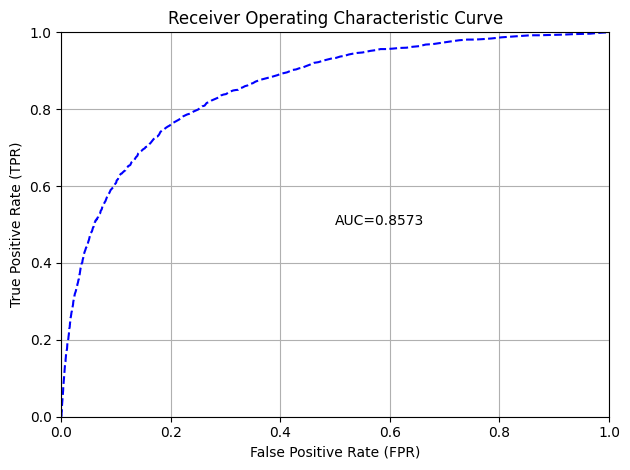

In [211]:
fpr, tpr = performance.roc()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Model ROC curve (area = %0.2f)' % performance.auc())
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : {}".format("D1"), size=18)
plt.legend(loc="lower right")
plt.show()

## Deep Learning Model 2

In [206]:

dl_model_2 = H2ODeepLearningEstimator(
    model_id="dl_model_2",
    hidden=[40, 40, 40],
    epochs=1000,
    score_validation_samples=1000,
    stopping_rounds=2,
    stopping_metric="AUTO",
    stopping_tolerance=0.01,
    balance_classes=True,
    class_sampling_factors=weights,
    seed=2000000
)


dl_model_2.train(
    x=predictors,
    y=response,
    training_frame=train,
    validation_frame=valid
)


dl_model_2.show()

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_model_2


Status of Neuron Layers: predicting SeriousDlqin2yrs, 2-class classification, bernoulli distribution, CrossEntropy loss, 3,802 weights/biases, 52.2 KB, 599,834 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  ---------------------  -------------------  ---------------------  --------------------
    1        10       Input      0.0
    2        40       Rectifier  0.0        0.0   0.0   0.003991248391976114  0.003499336540699005  0.0         -0.037877369707857725  0.26938843727111816  0.38219532511883625    0.13386380672454834
    3        40       Rectifier  0.0        0.0   0.0   0.004560036772263629  0.003093389794230461  0.0         -0.06749564884071106   0.18019366264343262  0.7988885828646526     0.07569658756256104
    4        40       Rectifier  0.0        0.0   0.0   0.07580529311882855   0.10497057437896729   0.0         -0.05401606461926576   0.1847848892211914   0.5463767996465075     0.3376384973526001
    5        2        Softmax               0.0   0.0   0.006490104060139857  0.005473805591464043  0.0         0.14836737781297415    0.7864553928375244   9.204201653473937e-06  0.012157563120126724

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.3486383168260731
RMSE: 0.5904560244642043
LogLoss: 1.1246105837665548
Mean Per-Class Error: 0.22419443527362098
AUC: 0.8559861737527859
AUCPR: 0.8519867867682546
Gini: 0.7119723475055717

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.03366848265928434
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3581  1368  0.2764   (1368.0/4949.0)
1      854   4112  0.172    (854.0/4966.0)
Total  4435  5480  0.2241   (2222.0/9915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0336685    0.787287  338
max f2                       0.00940595   0.858841  381
max f0point5                 0.0825495    0.797499  284
max accuracy                 0.037997     0.781039  332
max precision                0.478964     0.965517  30
max recall                   0.00104644   1         399
max specificity              0.662332     0.999798  0
max absolute_mcc             0.037997     0.562738  332
max min_per_class_accuracy   0.0424173    0.77648   326
max mean_per_class_accuracy  0.037997     0.780995  332
max tns                      0.662332     4948      0
max fns                      0.662332     4966      0
max fps                      0.00104644   4949      399
max tps                      0.00104644   4966      399
max tnr                      0.662332     0.999798  0
max fnr                      0.662332     1         0
max fpr                      0.00104644   1         399
max tpr                      0.00104644   1         399

Gains/Lift Table: Avg response rate: 50.09 %, avg score: 11.06 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.491132           1.89675   1.89675            0.95             0.5231      0.95                        0.5231              0.0191301       0.0191301          

In [212]:
performance = dl_model_2.model_performance(test)
performance

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.053917628109470414
RMSE: 0.23220169704261512
LogLoss: 0.19622101359242541
Mean Per-Class Error: 0.28317414866605384
AUC: 0.8515175109481611
AUCPR: 0.3919618128962522
Gini: 0.7030350218963222

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15367965224982943
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      21046  1208  0.0543   (1208.0/22254.0)
1      870    829   0.5121   (870.0/1699.0)
Total  21916  2037  0.0868   (2078.0/23953.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.15368      0.44379   182
max f2                       0.0628051    0.520179  257
max f0point5                 0.294309     0.459465  104
max accuracy                 0.365246     0.933119  69
max precision                0.529744     0.777778  10
max recall                   0.000815243  1         399
max specificity              0.648393     0.999955  0
max absolute_mcc             0.129761     0.399475  197
max min_per_class_accuracy   0.0387715    0.77575   293
max mean_per_class_accuracy  0.0427278    0.779141  286
max tns                      0.648393     22253     0
max fns                      0.648393     1699      0
max fps                      0.000815243  22254     399
max tps                      0.000815243  1699      399
max tnr                      0.648393     0.999955  0
max fnr                      0.648393     1         0
max fpr                      0.000815243  1         399
max tpr                      0.000815243  1         399

Gains/Lift Table: Avg response rate:  7.09 %, avg score:  4.78 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100196                   0.414742           9.4576    9.4576             0.670833         0.469181    0.670833                    0.469181            0.0947616       0.0947616                  845.76    845.76             0.0912117
2        0.0200392                   0.363849           7.51909   8.48835            0.533333         0.38802     0.602083                    0.4286              0.0753384       0.1701                     651.909   748.835            0.161517
3        0.0300171                   0.323163           6.54774   7.84328            0.464435         0.343407    0.556328                    0.400281            0.0653325       0.235433                   554.774   684.328            0.221098
4        0.0400367                   0.282061           6.168     7.42402            0.4375           0.301832    0.52659                     0.375644            0.0618011       0.297234                   516.8     642.402            0.276833
5        0.0500146                   0.248259           4.95505   6.93146            0.351464         0.26373     0.491653                    0.353317            0.0494408       0.346675                   395.505   593.146            0.319309
6        0.100029                    0.124989           3.68344   5.30745            0.261269         0.180569    0.376461                    0.266943            0.184226        0.530901                   268.344   430.745            0.463767
7        0.150002                    0.0740314          2.01404   4.21026            0.142857         0.0949104   0.298636                    0.209631            0.100647        0.631548                   101.404   321.026            0.518

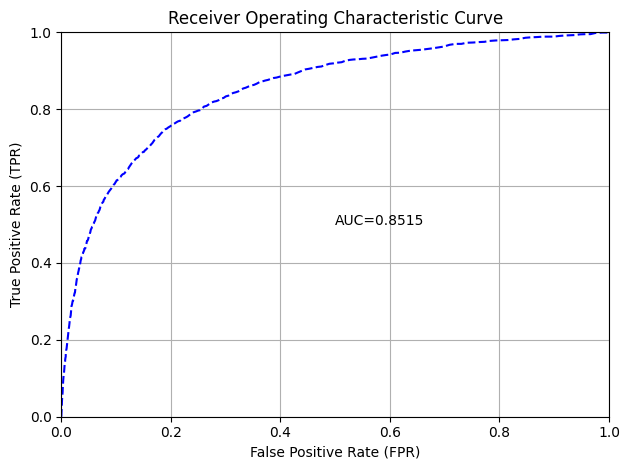

In [213]:
fpr, tpr = performance.roc()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Model ROC curve (area = %0.2f)' % performance.auc())
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : {}".format("D2"), size=18)
plt.legend(loc="lower right")
plt.show()

## Deep Learning Modèle 3

In [ ]:
dl_model_3 = H2ODeepLearningEstimator(
    model_id="dl_model_3",
    overwrite_with_best_model=True,
    hidden=[120, 120, 120],
    epochs=10,
    score_validation_samples=10000,
    score_duty_cycle=0.025,
    adaptive_rate=False,
    rate=0.01,
    rate_annealing=2e-6,
    momentum_start=0.2,
    momentum_stable=0.4,
    momentum_ramp=1e7,
    l1=1e-5,
    l2=1e-5,
    max_w2=10.,
    balance_classes=True,
    class_sampling_factors=weights,
    seed=2000000
)

dl_model_3.train(
    x=predictors,
    y=response,
    training_frame=train,
    validation_frame=valid
)


dl_model_3.show()

deeplearning Model Build progress: |██████████████████████

In [214]:
performance = dl_model_3.model_performance(test)
performance

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.05349214250495222
RMSE: 0.23128368404397276
LogLoss: 0.19414108934627386
Mean Per-Class Error: 0.29308795456047
AUC: 0.8455128501146244
AUCPR: 0.362105648303064
Gini: 0.6910257002292488

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23712479469477446
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      21037  1217  0.0547   (1217.0/22254.0)
1      903    796   0.5315   (903.0/1699.0)
Total  21940  2013  0.0885   (2120.0/23953.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.237125     0.428879  175
max f2                       0.0901536    0.513957  259
max f0point5                 0.381405     0.445246  117
max accuracy                 0.530059     0.931616  67
max precision                0.878751     0.8       3
max recall                   0.00125414   1         398
max specificity              0.962913     0.999955  0
max absolute_mcc             0.237125     0.382892  175
max min_per_class_accuracy   0.0577701    0.768806  291
max mean_per_class_accuracy  0.0601041    0.770526  288
max tns                      0.962913     22253     0
max fns                      0.962913     1699      0
max fps                      0.000838058  22254     399
max tps                      0.00125414   1699      398
max tnr                      0.962913     0.999955  0
max fnr                      0.962913     1         0
max fpr                      0.000838058  1         399
max tpr                      0.00125414   1         398

Gains/Lift Table: Avg response rate:  7.09 %, avg score:  7.09 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100196                   0.592041           8.16526   8.16526            0.579167         0.67213     0.579167                    0.67213             0.0818128       0.0818128                  716.526   716.526            0.0772743
2        0.0200392                   0.522642           7.69532   7.93029            0.545833         0.555783    0.5625                      0.613956            0.0771042       0.158917                   669.532   693.029            0.149481
3        0.0300171                   0.46941            6.42977   7.43151            0.456067         0.495024    0.527121                    0.574423            0.0641554       0.223072                   542.977   643.151            0.207794
4        0.0400367                   0.405416           6.34423   7.1594             0.45             0.436374    0.507821                    0.539874            0.0635668       0.286639                   534.423   615.94             0.26543
5        0.0500146                   0.35101            5.07303   6.74317            0.359833         0.37758     0.478297                    0.507497            0.050618        0.337257                   407.303   574.317            0.309172
6        0.100029                    0.195922           3.37747   5.06032            0.239566         0.263651    0.358932                    0.385574            0.168923        0.50618                    237.747   406.032            0.437159
7        0.150002                    0.121781           2.2496    4.12394            0.159566         0.154023    0.292513                    0.308433            0.112419        0.618599                   124.96    312.394            0.504373
8  

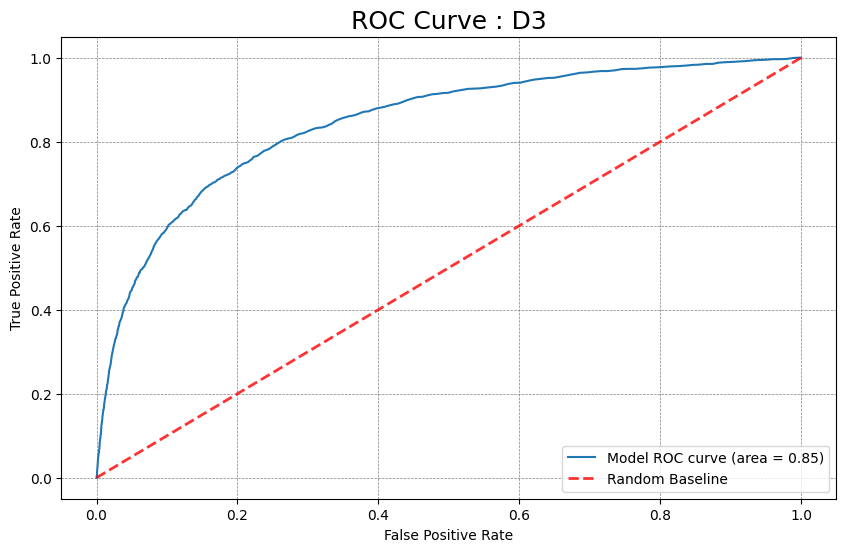

In [225]:
fpr, tpr = performance.roc()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Model ROC curve (area = %0.2f)' % performance.auc())
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : {}".format("D3"), size=18)
plt.legend(loc="lower right")
plt.show()